Clusters Data Set: (600, 10)
Swissroll Data Set:  (500, 3)
Halfmoons Data Set:  (500, 3)


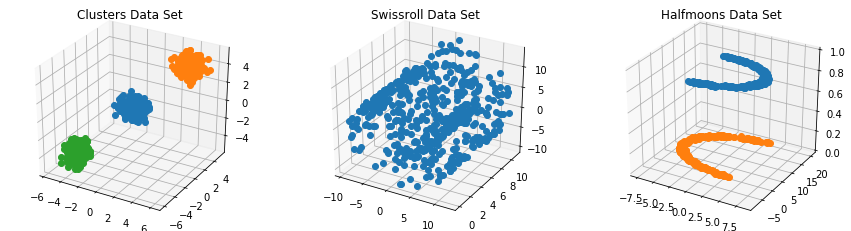

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from sklearn.neighbors import NearestNeighbors
from numpy import linalg as LA
from numpy import linalg as LA
from scipy.spatial.distance import pdist,squareform
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(15, 4))

#Load Clusters
clusters = np.loadtxt(r'C:\Users\ritvikpalvankar7\Desktop\FML\clusters.txt' ) 
X1_labels = clusters[:,10] 
X1 = clusters[:,0:10]
print('Clusters Data Set:', X1.shape)
ax = fig.add_subplot(131, projection='3d')
for i in range(1,4):
    ax.plot3D(X1[X1_labels==i,0],X1[X1_labels==i,1], X1[X1_labels==i,2],'o');
plt.title('Clusters Data Set');

# Load Data Swissroll
X2 = np.loadtxt(r'C:\Users\ritvikpalvankar7\Desktop\FML\swissroll.txt') 
print('Swissroll Data Set: ', X2.shape)
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(X2[:,0],X2[:,1], X2[:,2],'o');
plt.title('Swissroll Data Set');

#Load Halfmoons
halfmoons = np.loadtxt(r'C:\Users\ritvikpalvankar7\Desktop\FML\Halfmoons.txt') 
X3_labels = halfmoons[:,3] 
X3 = halfmoons[:,0:3]
print('Halfmoons Data Set: ',X3.shape)
ax = fig.add_subplot(133, projection='3d')
for i in range(1,4):
    ax.plot3D(X3[X3_labels==i,0],X3[X3_labels==i,1], X3[X3_labels==i,2],'o');
plt.title('Halfmoons Data Set');

# MDS

In [37]:


def MDS(data):
    D1=pdist(data)
    D=squareform(D1)
    

    
    D2=D**2

    N=len(D)
    

    #J value
    I=np.identity(N)
    k=np.ones((N,N))
    kmds=k/N
    J=I-kmds
    
    
    #B value
    Bmds=-1/2*(J@D2@J)
    
    
    # Finding the eigen values and eigen Vectors
    evals, evecs = LA.eig(Bmds)
    
    
    #sorting
    idxmds = evals.argsort()[::-1] 
    evals=evals[idxmds]
    evecs=evecs[:,idxmds]
    
    c=evecs[:,0:2]
    dmds=evals[0:2]
    
    #diagonal
    gmds=np.diag(dmds)
    

    
    L=np.sqrt(gmds)

    #Computing Y
    Y=c@L
    return plt.scatter(Y[:,0],Y[:,1])#(plt.plot(Y))

# CLUSTERS

C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


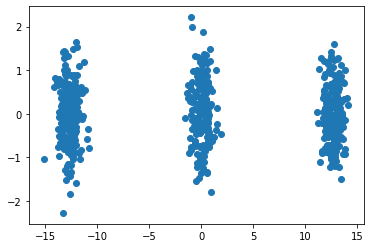

In [38]:
MDS(X1)

# SWISS ROLL

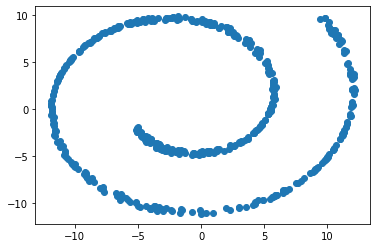

In [39]:
MDS(X2)

# HALF MOON

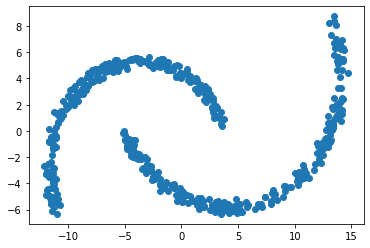

In [40]:
MDS(X3)

# ISOMAP

In [44]:
def Isomp(data3,k):
    n=NearestNeighbors()
    n.fit(data3)
    Neighbor_dist1,neigh_N1=n.kneighbors(data3, k)
    inf=99999
    N=len(data3)
    
    
    s=np.zeros((N,N))
    for i in range(0,N):
        for j in range(0,N):
            s[i][j]=j
    
    #Implementing the Floyd Warshall algorithm
    for i in range(N):
        for j in range(k):
            if neigh_N1[i][j]>=0:
                s[i][neigh_N1[i][j]]=Neighbor_dist1[i][j] 
    
    #Replacing remaining fields with infinity
    for i in range(N):
            for j in range(N):
                if s[i][j].is_integer():
                    s[i][j]=inf
                s[i][i]=0  
    
    N=len(data3)
    sp=np.zeros((N,N))
    for k in range(N):
        for i in range(N):
            for j in range(N):
                if s[i][k]+s[k][j] < s[i][j]:
                    s[i][j]=s[i][k]+s[k][j]
                
    D2=s**2

    N=len(s)
    

    #J value
    I=np.identity(N)
    k=np.ones((N,N))
    k_n=k/N
    J=I-k_n
    
    
    #B value
    B=-1/2*(J@D2@J)
    
    
    #Eigen values and Eigen Vectors
    evals, evecs = LA.eig(B)
    
    
    #sorting
    idx1 = evals.argsort()[::-1] 
    evals=evals[idx1]
    evecs=evecs[:,idx1]
    
    c=evecs[:,0:2]
    d=evals[0:2]
    
    #diagonal
    g=np.diag(d)
    

    #taking sqrt
    L=np.sqrt(g)

    #Computing Y
    Y=c@L
    
    f1=plt.figure()
    plt.plot(Y)
    f2=plt.figure()
    return plt.scatter(Y[:,0],Y[:,1])

           
    

C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


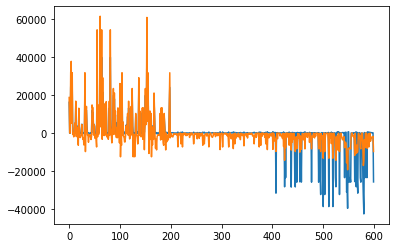

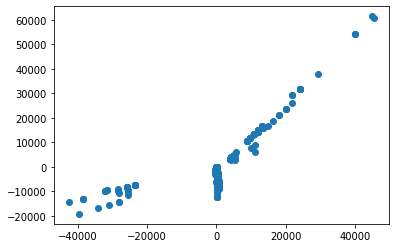

In [45]:
Isomp(X1,3)

C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


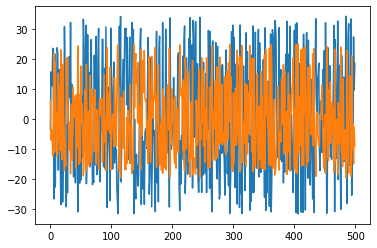

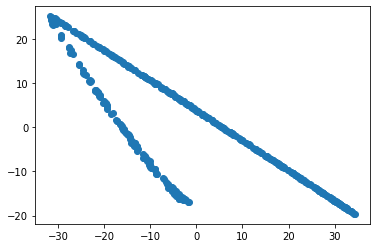

In [46]:
Isomp(X2,17)

C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


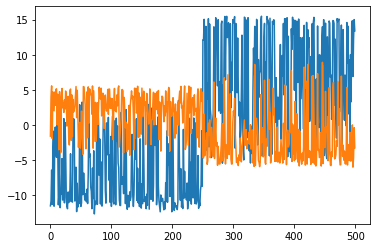

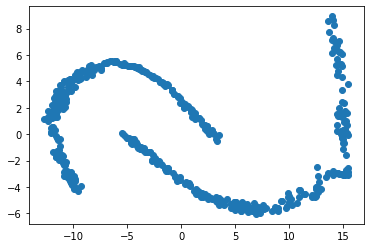

In [47]:
Isomp(X3,120)

# Locally Linear Embedding (LLE)

In [48]:
def LLE(dataLLE,K,dim):
    n_points1 = len(dataLLE)
    ndata = np.shape(dataLLE)[0]
    ndim = np.shape(dataLLE)[1]
    d = np.zeros((ndata,ndata),dtype=float)

    for i in range(ndata):
        for j in range(i+1,ndata):
            for k in range(ndim):
                d[i,j] += (dataLLE[i,k] - dataLLE[j,k])**2
            d[i,j] = np.sqrt(d[i,j])
            d[j,i] = d[i,j]
        
    indices_1 = d.argsort(axis=1)
    neighbors_1 = indices_1[:,1:K+1]

    W = np.zeros((K,ndata),dtype=float)
    

    for i in range(ndata):
        Z  = dataLLE[neighbors_1[i,:],:] - np.kron(np.ones((K,1)),dataLLE[i,:])
        C = np.dot(Z,np.transpose(Z))
        C = C+np.identity(K)*1e-3*np.trace(C)
        W[:,i] = np.transpose(np.linalg.solve(C,np.ones((K,1))))
        W[:,i] = W[:,i]/np.sum(W[:,i])

    M = np.eye(ndata,dtype=float)
    for i in range(ndata):
        w_1 = np.transpose(np.ones((1,np.shape(W)[0]))*np.transpose(W[:,i]))
        j = neighbors_1[i,:]
        w_2 = np.dot(w_1,np.transpose(w_1))
        for k in range(K):
            M[i,j[k]] -= w_1[k]
            M[j[k],i] -= w_1[k]
            for l in range(K):
                M[j[k],j[l]] += w_2[k,l]

    evals,evecs = np.linalg.eig(M)
    ind = np.argsort(evals)
    y = evecs[:,ind[1:dim+1]]*np.sqrt(ndata)
    return(plt.scatter(y[:,0],y[:,1],c='Blue'))

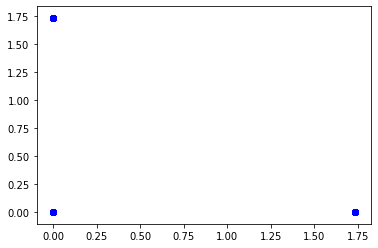

In [49]:
lle_clusters=LLE(X1,10,2)

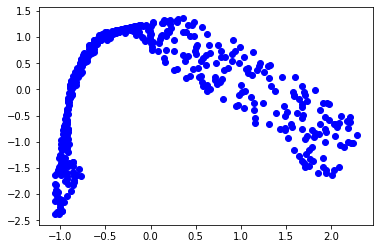

In [50]:
lle_swissroll=LLE(X2,16,2)

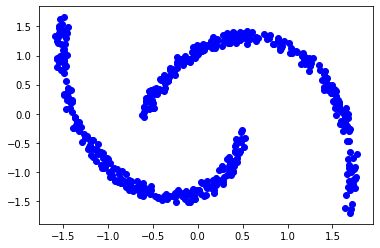

In [51]:
lle_halfmoon=LLE(X3,100,2)

# RESULTS

# For MDS:
CLUSTER.txt: It can be seen from the observation that the  three groups of data are classified into separate classes which completes our goal


SWISS ROLL.txt : It can be seen from the observation that for MDS the data is not unwrapped


HALF-MOONS.txt : It can be seen from the observation that data is separated into two different classes.

# For ISOMAP:
CLUSTER.txt :  Data groups have not been classified into 3 classes in 2-D


SWISS ROLL.txt : The projection does not have far points far and near points as near.


HALF-MOONS.txt : The data of two groups overlap

# For LLE:
CLUSTER.txt: Data of groups are classified into 3 different classes.


SWISS ROLL.txt:  LLE unwraps the  dataset and so the far points are far and points closer to each other are closer which satisfies our goal.


HALF-MOONS.txt: It is clearly evident from the observation that number of neighbors is directly proportional to accuracy and the data is  well-separated into two different classes.